<a href="https://colab.research.google.com/github/Jade-P/MLGroupProject/blob/Happy--Sohyun/CNN_after_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Environment & path Setup 

In [ ]:
# Download dataset
!wget https://raw.githubusercontent.com/Jade-P/MLGroupProject/main/archive.zip

--2022-11-27 23:59:08--  https://raw.githubusercontent.com/Jade-P/MLGroupProject/main/archive.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62587032 (60M) [application/zip]
Saving to: ‘archive.zip’

archive.zip         100%[===================>]  59.69M   173MB/s    in 0.3s    

2022-11-27 23:59:09 (173 MB/s) - ‘archive.zip’ saved [62587032/62587032]



In [ ]:
!unzip archive.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: Training/Training/Sad/Sad-370.jpg  
  inflating: Training/Training/Sad/Sad-3700.jpg  
  inflating: Training/Training/Sad/Sad-3701.jpg  
  inflating: Training/Training/Sad/Sad-3702.jpg  
  inflating: Training/Training/Sad/Sad-3703.jpg  
  inflating: Training/Training/Sad/Sad-3704.jpg  
  inflating: Training/Training/Sad/Sad-3705.jpg  
  inflating: Training/Training/Sad/Sad-3706.jpg  
  inflating: Training/Training/Sad/Sad-3707.jpg  
  inflating: Training/Training/Sad/Sad-3708.jpg  
  inflating: Training/Training/Sad/Sad-3709.jpg  
  inflating: Training/Training/Sad/Sad-371.jpg  
  inflating: Training/Training/Sad/Sad-3710.jpg  
  inflating: Training/Training/Sad/Sad-3711.jpg  
  inflating: Training/Training/Sad/Sad-3712.jpg  
  inflating: Training/Training/Sad/Sad-3713.jpg  
  inflating: Training/Training/Sad/Sad-3714.jpg  
  inflating: Training/Training/Sad/Sad-3715.jpg  
  inflating: Training/Training/Sad/Sad-3716.jpg  
  inflating: Tra

#Load Data

In [ ]:
import numpy as np 
from tqdm import tqdm
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
RANDOM_SEED = 123

In [ ]:
TRAIN_DIR = ('Training/Training/')
TEST_DIR = ('Testing/Testing/')

In [ ]:
emotions = ['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Suprise']

In [ ]:
def load_data(dir_path, IMG_SIZE):
   
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(emotions)):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    img = img.astype('float32') / 255 # NORMALIZES PIXELS 
                    resized = cv2.resize(img, IMG_SIZE, interpolation = cv2.INTER_AREA)
                    X.append(resized)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels

In [ ]:
IMG_SIZE= (48, 48)

In [ ]:
X_train, y_train, train_labels = load_data(TRAIN_DIR, IMG_SIZE)

100%|██████████| 6/6 [00:03<00:00,  1.62it/s]


28273 images loaded from Training/Training/ directory.


In [ ]:
train_labels

{0: 'Angry', 1: 'Fear', 2: 'Happy', 3: 'Neutral', 4: 'Sad', 5: 'Suprise'}

In [ ]:
X_test, y_test, test_labels = load_data(TEST_DIR,IMG_SIZE)

100%|██████████| 6/6 [00:00<00:00, 11.41it/s]


7067 images loaded from Testing/Testing/ directory.


In [ ]:
X_train.shape

(28273, 48, 48, 3)

#Data exploration

## Count number of images for each class

source: https://www.kaggle.com/code/apollo2506/facial-recognition

In [ ]:
import pandas as pd

_, train_count = np.unique(y_train,return_counts=True)
_, test_count = np.unique(y_test,return_counts=True)

df = pd.DataFrame(data = (train_count,test_count))
df = df.T
df['Name'] = emotions
data = df.rename(columns={0: "train", 1: "test", "Name" : "emotion"})
data

,train,test,emotion
0,3995,958,Angry
1,4097,1024,Fear
2,7215,1774,Happy
3,4965,1233,Neutral
4,4830,1247,Sad
5,3171,831,Suprise


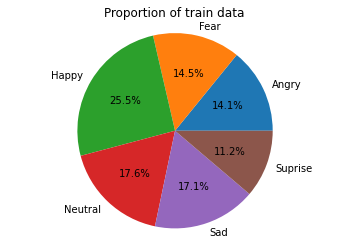

In [ ]:
plt.pie(train_count,
       explode=(0,0,0,0,0,0),
       labels=emotions,
       autopct = '%1.1f%%')
plt.axis('equal')
plt.title("Proportion of train data")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


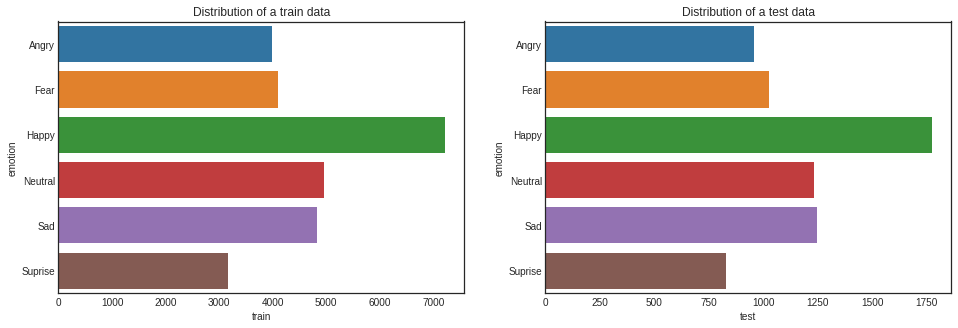

In [ ]:
import seaborn as sns

plt.style.use('seaborn-white')
fig, ax = plt.subplots(1,2, figsize=(16,5))
sns.barplot(data["train"], data["emotion"], ax=ax[0])
ax[0].set_title("Distribution of a train data")
sns.barplot(data["test"], data["emotion"], ax=ax[1])
ax[1].set_title("Distribution of a test data")
plt.show()

## Size of Images

In [ ]:
widths = dict()
heights = dict()

for img in X_train:
  width, height, _ = img.shape
  widths[width] = widths.get(width,0)+1
  heights[height] = heights.get(height,0)+1

In [ ]:
print(widths)
print(heights)

{48: 28273}
{48: 28273}


Every image is in size of 48 * 48, so we don't need resizing.

##Plot samples of data

Source: https://www.kaggle.com/code/basel99/facial-recognition

In [ ]:
def plot_samples(X, y, labels_dict, n=50):
   
    for index in range(len(labels_dict)):
        imgs = X[np.argwhere(y == index)][:n]
        j = 10
        i = int(n/j)

        plt.figure(figsize=(10,3))
        c = 1
        for img in imgs:
            plt.subplot(i,j,c)
            plt.imshow(img[0])

            plt.xticks([])
            plt.yticks([])
            c += 1
        plt.suptitle(labels_dict[index])
        plt.show()

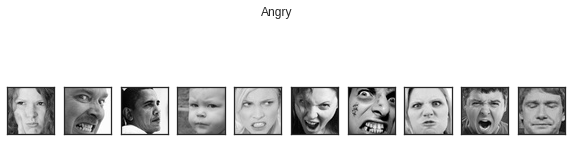

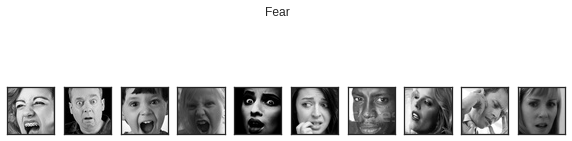

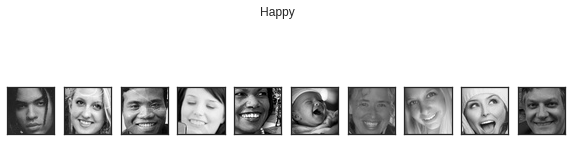

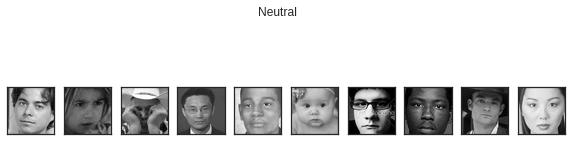

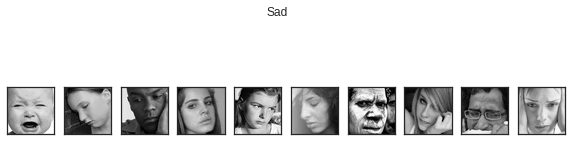

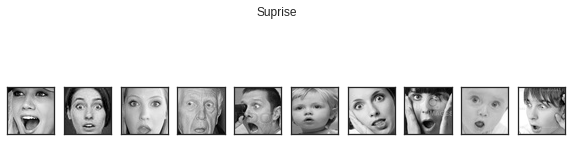

In [ ]:
plot_samples(X_train, y_train, train_labels, 10)

#Data preprocessing

##Removing Duplicates

Remove duplicates of image to prevent overfitting.

resource: https://mizykk.tistory.com/55

In [ ]:
import cv2  
from skimage.metrics import structural_similarity

image_list = []

path = TRAIN_DIR + '/Happy'

for f in os.listdir(path):
  image_list.append(f)

img_size = list(map(lambda x: os.path.getsize(path + '/' + x), image_list))

# Find Same Photos
img_data = pd.DataFrame({'filename':image_list, 'size':img_size})

print('number of images :', len(img_data))

number of images : 7215


In [ ]:
img_data

,filename,size
0,Happy-3339.jpg,1381
1,Happy-7031.jpg,1732
2,Happy-3069.jpg,1772
3,Happy-5760.jpg,1557
4,Happy-2379.jpg,1852
...,...,...
7210,Happy-858.jpg,1637
7211,Happy-1891.jpg,1650
7212,Happy-3947.jpg,1485
7213,Happy-4718.jpg,1447


In [ ]:
# Photo Value Counts
filename_cnts = pd.DataFrame({'filename':img_data['filename'].value_counts().index, 'fn_counts':img_data['filename'].value_counts().values})   
imgsize_cnts = pd.DataFrame({'size':img_data['size'].value_counts().index, 'size_counts':img_data['size'].value_counts().values})   

img_data = pd.merge(img_data, filename_cnts, how = 'left', on = 'filename')
img_data = pd.merge(img_data, imgsize_cnts, how = 'left', on = 'size')

img_data.sample(2)

,filename,size,fn_counts,size_counts
4557,Happy-5741.jpg,1540,1,24
4398,Happy-6026.jpg,1557,1,23


In [ ]:
SimilarSizeData = imgsize_cnts[imgsize_cnts['size_counts'] > 1]

###Use structural similarity to compare similarity of images

In [ ]:
def CompareImage(imageA, imageB):

    # Grayscale
    grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)
    
    # Check Image structure
    if len(grayA)==len(grayB):
        (score, diff) = structural_similarity(grayA, grayB, full=True)

    return score

In [ ]:
delete = dict()

In [ ]:
for i in range(len(SimilarSizeData)):

    temp = img_data[img_data['size']==SimilarSizeData['size'][i]].reset_index(drop = True).sort_values(['filename'])

    for j in range(len(temp) - 1):
      filenameA = temp['filename'][j]
      compared = False

      for key in delete:
        if (filenameA in delete[key]):
          compared = True
          break
      
      if compared:
        continue

      for k in range(j+1, len(temp)):
        filenameB = temp['filename'][k]
        
        imageA = cv2.imread(path+'/'+filenameA)
        imageB = cv2.imread(path+'/'+filenameB)

        score = CompareImage(imageA, imageB)
        
        if (score == 1 or score > 0.6):
          if filenameA not in delete:
            delete[filenameA] = [filenameB]
          else:
            delete[filenameA].append(filenameB)
          if (score < 1):
            print(filenameA + ", " + filenameB)
            print("score: " + str(score))
          

Happy-2461.jpg, Happy-6680.jpg
score: 0.7168389603349193


### See if similar images are similar enough to be removed

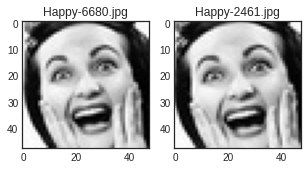

In [ ]:
plt.figure(0, figsize=(5,3))
ax = plt.subplot(1,2,1)
ax.set_title('Happy-6680.jpg')
img1 = cv2.imread(path+"/"+ 'Happy-6680.jpg')
plt.imshow(img1,cmap="gray")

ax = plt.subplot(1,2,2)
ax.set_title('Happy-2461.jpg')
img2 = cv2.imread(path+"/"+ 'Happy-2461.jpg')
plt.imshow(img2,cmap="gray")

In [ ]:
total = [len(value) for key, value in delete.items()]
print(str(sum(total)) + " duplicates found")

129 duplicates found


###Plotting some duplicates to confirm they are the same

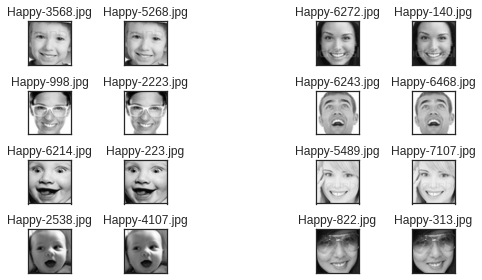

In [ ]:
plt.figure(0, figsize=(8,4))
cpt = 0

n = 8

for key in delete:
  if (n == 0):
    break

  cpt += 1
  ax = plt.subplot(4,6,cpt)
  ax.set_title(key)
  img = cv2.imread(path+"/"+ key)
  plt.tick_params(labelleft=False,labelbottom=False)
  plt.imshow(img,cmap="gray")

  for file in delete[key]:
    cpt += 1
    ax = plt.subplot(4,6,cpt)
    ax.set_title(file)

    img = cv2.imread(path+"/"+ file)
    plt.tick_params(labelleft=False,labelbottom=False)
    plt.imshow(img,cmap="gray")
    pass
  
  if (cpt % 3 != 0):
    cpt +=1
  n -= 1

plt.tight_layout()
plt.show()

In [ ]:
orig_list = image_list

print("original image number: " + str(len(orig_list)))

original image number: 7215


In [ ]:
for key in delete:
  for val in delete[key]:
    image_list.remove(val)

print("updated images number: " + str(len(image_list)))

updated images number: 7086


###Remove images

In [ ]:
for key in delete:
  print("Removing duplicates of " + key)
  for val in delete[key]:
    print(val + " removed")
    os.remove(TRAIN_DIR + "Happy/" + val)

Removing duplicates of Happy-3568.jpg
Happy-5268.jpg removed
Removing duplicates of Happy-6272.jpg
Happy-140.jpg removed
Removing duplicates of Happy-998.jpg
Happy-2223.jpg removed
Removing duplicates of Happy-6243.jpg
Happy-6468.jpg removed
Removing duplicates of Happy-6214.jpg
Happy-223.jpg removed
Removing duplicates of Happy-5489.jpg
Happy-7107.jpg removed
Removing duplicates of Happy-2538.jpg
Happy-4107.jpg removed
Removing duplicates of Happy-822.jpg
Happy-313.jpg removed
Removing duplicates of Happy-3907.jpg
Happy-173.jpg removed
Removing duplicates of Happy-4095.jpg
Happy-2378.jpg removed
Removing duplicates of Happy-2342.jpg
Happy-3371.jpg removed
Removing duplicates of Happy-2818.jpg
Happy-4403.jpg removed
Happy-307.jpg removed
Removing duplicates of Happy-2760.jpg
Happy-598.jpg removed
Removing duplicates of Happy-3730.jpg
Happy-1685.jpg removed
Removing duplicates of Happy-1864.jpg
Happy-3795.jpg removed
Removing duplicates of Happy-876.jpg
Happy-5820.jpg removed
Removing d

###Removing Duplicates (Repeat for other classes)

In [ ]:
import cv2  
from skimage.metrics import structural_similarity

def getImgData(path):

  image_list = []

  for f in os.listdir(path):
    image_list.append(f)

  img_size = list(map(lambda x: os.path.getsize(path + '/' + x), image_list))

  img_data = pd.DataFrame({'filename':image_list, 'size':img_size})

  print('number of images :', len(img_data))
  return img_data

In [ ]:
def getDuplicates(img_data):
  # Photo Value Counts
  imgsize_cnts = pd.DataFrame({'size':img_data['size'].value_counts().index, 'size_counts':img_data['size'].value_counts().values})   
  img_data = pd.merge(img_data, imgsize_cnts, how = 'left', on = 'size')
  SimilarSizeData = imgsize_cnts[imgsize_cnts['size_counts'] > 1]

  delete = dict()

  for i in range(len(SimilarSizeData)):
    temp = img_data[img_data['size']==SimilarSizeData['size'][i]].reset_index(drop = True).sort_values(['filename'])

    for j in range(len(temp) - 1):
      filenameA = temp['filename'][j]
      compared = False

      for key in delete:
        if (filenameA in delete[key]):
          compared = True
          break
      
      if compared:
        continue

      for k in range(j+1, len(temp)):
        filenameB = temp['filename'][k]
        
        imageA = cv2.imread(path+'/'+filenameA)
        imageB = cv2.imread(path+'/'+filenameB)

        score = CompareImage(imageA, imageB)
        
        if (score == 1 or score > 0.6):
          if filenameA not in delete:
            delete[filenameA] = [filenameB]
          else:
            delete[filenameA].append(filenameB)
          if (score < 1):
            print(filenameA + ", " + filenameB)
            print("score: " + str(score))
          
    total = [len(value) for key, value in delete.items()]
    print(str(sum(total)) + " duplicates found")

    return delete

In [ ]:
def plotDuplicates(path, delete):

    plt.figure(0, figsize=(8,4))
    cpt = 0

    n = 8
    
    for key in delete:
      if (n == 0):
        break

      cpt += 1
      ax = plt.subplot(4,6,cpt)
      ax.set_title(key)
      img = cv2.imread(path+"/"+ key)
      plt.tick_params(labelleft=False,labelbottom=False)
      plt.imshow(img,cmap="gray")

      for file in delete[key]:
        cpt += 1
        ax = plt.subplot(4,6,cpt)
        ax.set_title(file)

        img = cv2.imread(path+"/"+ file)
        plt.tick_params(labelleft=False,labelbottom=False)
        plt.imshow(img,cmap="gray")
        pass
      
      while (cpt % 4 != 0):
        cpt +=1
      n -= 1

    plt.tight_layout()
    plt.show()

In [ ]:
def removeDuplicates(path, delete, image_list):
    orig_list = image_list
    print("original image number: " + str(len(orig_list)))

    for key in delete:
      for val in delete[key]:
        image_list.remove(val)
    print("updated images number: " + str(len(image_list)))

    remove_cnt = 0

    for key in delete:
      for val in delete[key]:
        os.remove(path + "/" + val)
        remove_cnt +=1

    print(str(remove_cnt) + " number of duplicates removed")

Finding for duplicates in class Angry...
number of images : 3995
Angry-1917.jpg, Angry-1718.jpg
score: 0.8265641046829441
Angry-1917.jpg, Angry-2085.jpg
score: 0.8265641046829441
Angry-1917.jpg, Angry-18.jpg
score: 0.8265641046829441
4 duplicates found


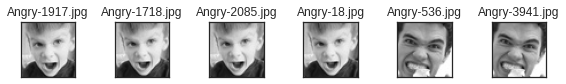

original image number: 3995
updated images number: 3991
4 number of duplicates removed


Finding for duplicates in class Fear...
number of images : 4097
4 duplicates found


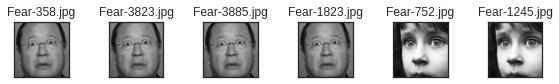

original image number: 4097
updated images number: 4093
4 number of duplicates removed


Finding for duplicates in class Happy...
number of images : 7086
0 duplicates found


<Figure size 576x288 with 0 Axes>

original image number: 7086
updated images number: 7086
0 number of duplicates removed


Finding for duplicates in class Neutral...
number of images : 4965
0 duplicates found


<Figure size 576x288 with 0 Axes>

original image number: 4965
updated images number: 4965
0 number of duplicates removed


Finding for duplicates in class Sad...
number of images : 4830
2 duplicates found


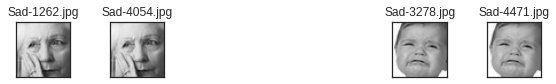

original image number: 4830
updated images number: 4828
2 number of duplicates removed


Finding for duplicates in class Suprise...
number of images : 3171
6 duplicates found


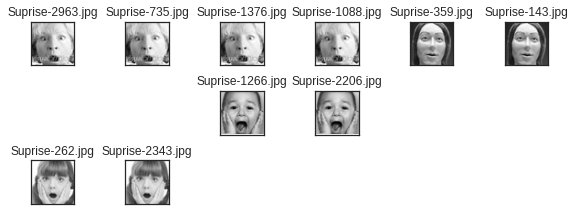

original image number: 3171
updated images number: 3165
6 number of duplicates removed




In [ ]:
for emotion in emotions:
  print("Finding for duplicates in class " + emotion + "...")

  path = TRAIN_DIR + emotion
  image_list = []

  for f in os.listdir(path):
    image_list.append(f)

  img_data = getImgData(path)
  delete_list = getDuplicates(img_data)
  plotDuplicates(path, delete_list)
  removeDuplicates(path, delete_list, image_list)

  print("\n")

##Removing outliers (faulty inputs)

Remove image that doesn't look like a face, or includes more than one face. Outliers were found manually.

In [ ]:
Happy_outliers = [1414,2541,4488,5326,1091,1817,2039,2226,2250,2819,3964,4123,6270,6441,6627]

In [ ]:
path = TRAIN_DIR + "Happy"

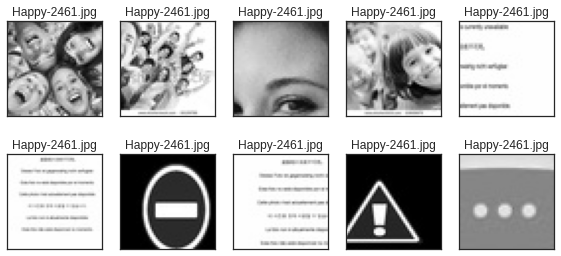

In [ ]:
plt.figure(0, figsize=(8,4))
cpt = 0

n = 10

for outlier in Happy_outliers:
  if (n == 0):
    break

  cpt += 1
  ax = plt.subplot(2,5,cpt)
  ax.set_title(key)
  img = cv2.imread(path+"/"+ "Happy-" + str(outlier) + ".jpg")
  plt.tick_params(labelleft=False,labelbottom=False)
  plt.imshow(img,cmap="gray")

  n -= 1

plt.tight_layout()
plt.show()

In [ ]:
for outlier in Happy_outliers:
  os.remove(TRAIN_DIR + "Happy/Happy-" + str(outlier) + ".jpg")

In [ ]:
emotions

['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Suprise']

###Repeat for other classes

In [ ]:
outliers = {'Angry': [786, 930, 1078, 1596, 1730, 1835, 1866, 2185, 2822, 2903, 3091, 3384, 3714, 3975], 
            'Fear':[768, 562], 
            'Neutral':[1058, 2062, 2156, 2657, 2997, 3392, 363, 3767, 3977, 4186, 4352, 4473, 4859], 
            'Sad':[1721, 1891, 1966, 4001],
            'Suprise':[80, 128, 211, 213, 233, 259, 300, 309, 312, 335, 353, 596, 611, 665, 758, 1288, 1499, 2055, 2214, 2276]}

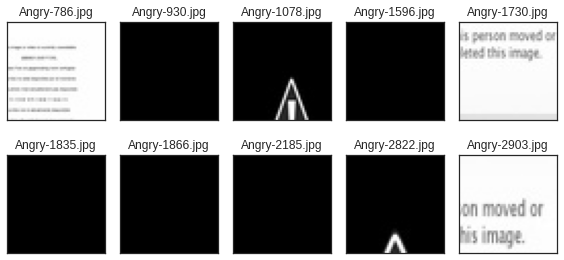

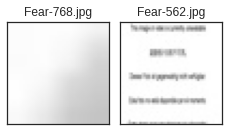

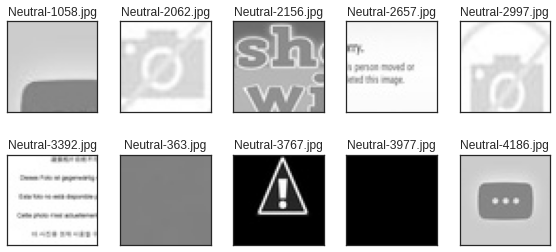

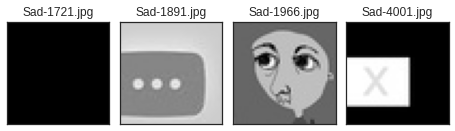

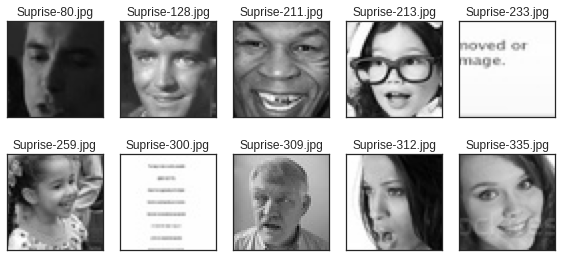

In [ ]:
for emotion in outliers:
  path = TRAIN_DIR + emotion

  plt.figure(0, figsize=(8,4))
  cpt = 0

  n = 10

  for outlier in outliers[emotion]:
    if (n == 0):
      break

    cpt += 1
    ax = plt.subplot(2,5,cpt)
    img_name = emotion + "-" + str(outlier) + ".jpg"
    ax.set_title(img_name)
    img = cv2.imread(path+"/"+ img_name)
    plt.tick_params(labelleft=False,labelbottom=False)
    plt.imshow(img,cmap="gray")

    n -= 1

  plt.tight_layout()
  plt.show()

  #remove outlier
  for outlier in outliers[emotion]:
    os.remove(path + "/" + emotion + "-" + str(outlier) + ".jpg")

##Load Data (after preprocessing)

In [ ]:
def load_data(dir_path, IMG_SIZE):
   
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(emotions)):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file, cv2.IMREAD_GRAYSCALE)
                    img = img.astype('float32') / 255
                    resized = cv2.resize(img, IMG_SIZE, interpolation = cv2.INTER_AREA)
                    X.append(resized)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels

In [ ]:
IMG_SIZE= (48, 48)

In [ ]:
X_train, y_train, train_labels = load_data(TRAIN_DIR, IMG_SIZE)

100%|██████████| 6/6 [00:01<00:00,  3.78it/s]


28060 images loaded from Training/Training/ directory.


In [ ]:
train_labels

{0: 'Angry', 1: 'Fear', 2: 'Happy', 3: 'Neutral', 4: 'Sad', 5: 'Suprise'}

In [ ]:
X_test, y_test, test_labels = load_data(TEST_DIR,IMG_SIZE)

100%|██████████| 6/6 [00:00<00:00, 14.79it/s]

7067 images loaded from Testing/Testing/ directory.


In [ ]:
X_train.shape

(28060, 48, 48)

About 200 images removed in total!

##Final data distribution

In [ ]:
_, train_count = np.unique(y_train,return_counts=True)
_, test_count = np.unique(y_test,return_counts=True)

df = pd.DataFrame(data = (train_count,test_count))
df = df.T
df['Name'] = emotions
data = df.rename(columns={0: "train", 1: "test", "Name" : "emotion"})

In [ ]:
data_after = df.rename(columns={0: "Training Data", 1: "Testing Data","Name" : "Emotions"})
data_after = data_after.set_index("Emotions")
data_after

,Training Data,Testing Data
Emotions,,
Angry,3977,958
Fear,4091,1024
Happy,7071,1774
Neutral,4952,1233
Sad,4824,1247
Suprise,3145,831


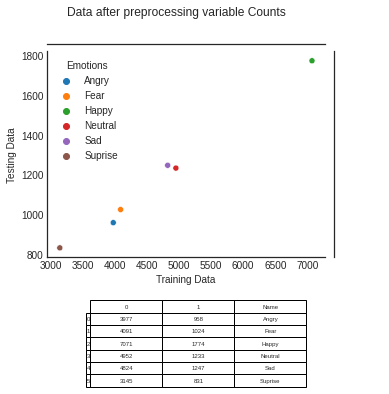

In [ ]:
import seaborn as sns
#preprocessing table 
sns.jointplot(data=data_after, x="Training Data", y="Testing Data",hue = "Emotions")

plt.suptitle('Data after preprocessing variable Counts')
plt.subplots_adjust(left=0.2, bottom=0.4)
table = plt.table(cellText=df.values,
          rowLabels=df.index,
          colLabels=df.columns,
          cellLoc = 'center', rowLoc = 'center',
          transform=plt.gcf().transFigure,
          bbox = ([0.3, 0.1, 0.5, 0.2]))
table.auto_set_font_size(False)
table.set_fontsize(6)
plt.savefig('table.pdf',bbox_inches='tight')

##Encoding Classes

One-hot encoding with the emotion class

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=6)
Y_train

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

##Normalization

This is demonstration of normalizing single image. It will be done when we are actually training/building the model.

In [ ]:
img = X_train[0]

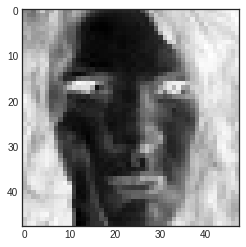

In [ ]:
norm_image = (img - np.min(img)) / (np.max(img) - np.min(img))
plt.imshow(norm_image)

In [ ]:
np.array_equal(img, norm_image)

False

#Model Building

In [ ]:
# load libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

# NOTE: the pixels were already normalized from 0-1 values upon loading 

In [ ]:
X_train.shape

(28060, 48, 48)

In [ ]:
y_train

array([0, 0, 0, ..., 5, 5, 5])

In [ ]:
y_test

array([0, 0, 0, ..., 5, 5, 5])

In [ ]:
# Input image dimensions
img_rows, img_cols = 48, 48

# Channels go last for TensorFlow backend
X_train_reshaped = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# one hot encode y_train and y_test
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

y_train = enc.fit_transform(y_train.reshape(-1, 1))

y_test = enc.fit_transform(y_test.reshape(-1, 1))

y_train = y_train.toarray()
y_test = y_test.toarray()

In [ ]:
y_train

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

In [ ]:
y_test

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

In [ ]:
#initial model from https://medium.com/themlblog/how-to-do-facial-emotion-recognition-using-a-cnn-b7bbae79cd8f article:

model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1), data_format='channels_last'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*2*64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(2*2*2*64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*2*64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax')) # gives probability that the input is each of the 6 classes
# one hot encode y_train and y_test

# softmax is necessary for multi-class classification problems 

# grab the dimension with the highest probability and that will be your prediction -- how??

In [ ]:
y_train.shape

(28060, 6)

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size = 64, steps_per_epoch = 28060/64, validation_data=(X_test, y_test), workers=16)

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print(test_acc)

In [91]:
# our further customized model:
modelc = Sequential()

#customized first 2 kernels to 7x7; added another convolutional layer
modelc.add(Conv2D(64, kernel_size=(7, 7), activation='relu', input_shape=(48, 48, 1), data_format='channels_last'))
modelc.add(Conv2D(64, kernel_size=(7, 7), activation='relu', padding='same'))
modelc.add(BatchNormalization())
modelc.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
modelc.add(BatchNormalization())
modelc.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
modelc.add(Dropout(0.5))

#customized first kernel to 7x7, second to 5x5, and added 3rd
modelc.add(Conv2D(2*64, kernel_size=(7, 7), activation='relu', padding='same'))
modelc.add(BatchNormalization())
modelc.add(Conv2D(2*64, kernel_size=(5, 5), activation='relu', padding='same'))
modelc.add(BatchNormalization())
modelc.add(Conv2D(2*64, kernel_size=(3, 3), activation='relu', padding='same'))
modelc.add(BatchNormalization())
modelc.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
modelc.add(Dropout(0.5))

#customized first kernel to 7x7, second to 5x5, and added 3rd
modelc.add(Conv2D(2*2*64, kernel_size=(7, 7), activation='relu', padding='same'))
modelc.add(BatchNormalization())
modelc.add(Conv2D(2*2*64, kernel_size=(5, 5), activation='relu', padding='same'))
modelc.add(BatchNormalization())
modelc.add(Conv2D(2*2*64, kernel_size=(3, 3), activation='relu', padding='same'))
modelc.add(BatchNormalization())
modelc.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
modelc.add(Dropout(0.5))

#customized first kernel to 7x7, second to 5x5, and added 3rd
modelc.add(Conv2D(2*2*2*64, kernel_size=(7, 7), activation='relu', padding='same'))
modelc.add(BatchNormalization())
modelc.add(Conv2D(2*2*2*64, kernel_size=(5, 5), activation='relu', padding='same'))
modelc.add(BatchNormalization())
modelc.add(Conv2D(2*2*2*64, kernel_size=(3, 3), activation='relu', padding='same'))
modelc.add(BatchNormalization())
modelc.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
modelc.add(Dropout(0.5))

modelc.add(Flatten())

modelc.add(Dense(2*2*2*64, activation='relu'))
modelc.add(Dropout(0.4))
modelc.add(Dense(2*2*64, activation='relu'))
modelc.add(Dropout(0.4))
modelc.add(Dense(2*64, activation='relu'))
modelc.add(Dropout(0.5))

modelc.add(Dense(6, activation='softmax')) # gives probability that the input is each of the 6 classes

In [92]:
modelc.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [93]:
from keras.callbacks import EarlyStopping

In [96]:
historyc = modelc.fit(X_train, y_train, epochs=100, batch_size = 128, steps_per_epoch = 28060/128, validation_data=(X_test, y_test), workers=16,
                      callbacks = EarlyStopping(monitor='val_loss', restore_best_weights=True, mode='min', min_delta=0.01, patience=10))

Epoch 1/100
219/219 [==============================] - 43s 195ms/step - loss: 1.7679 - accuracy: 0.2369 - val_loss: 1.7434 - val_accuracy: 0.2510
Epoch 2/100
219/219 [==============================] - 47s 214ms/step - loss: 1.7460 - accuracy: 0.2495 - val_loss: 1.7574 - val_accuracy: 0.2510
Epoch 3/100
219/219 [==============================] - 46s 210ms/step - loss: 1.6912 - accuracy: 0.2847 - val_loss: 1.6411 - val_accuracy: 0.2943
Epoch 4/100
219/219 [==============================] - 44s 202ms/step - loss: 1.6177 - accuracy: 0.3306 - val_loss: 1.6848 - val_accuracy: 0.2728
Epoch 5/100
219/219 [==============================] - 44s 201ms/step - loss: 1.5253 - accuracy: 0.3749 - val_loss: 1.4854 - val_accuracy: 0.3822
Epoch 6/100
219/219 [==============================] - 44s 202ms/step - loss: 1.4472 - accuracy: 0.4062 - val_loss: 1.7524 - val_accuracy: 0.2730
Epoch 7/100
219/219 [==============================] - 44s 201ms/step - loss: 1.3914 - accuracy: 0.4252 - val_loss: 1.3717 -

In [104]:
# save model to Google Drive
from google.colab import drive
drive.mount('/content/drive')

modelc.save('/content/drive/MyDrive/ECS171/CNN_1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


221/221 - 5s - loss: 1.1168 - accuracy: 0.5660 - 5s/epoch - 21ms/step
0.5660110116004944


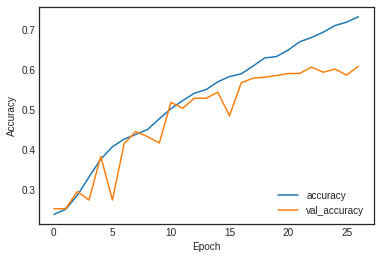

In [98]:
plt.plot(historyc.history['accuracy'], label='accuracy')
plt.plot(historyc.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = modelc.evaluate(X_test,  y_test, verbose=2)
print(test_acc)

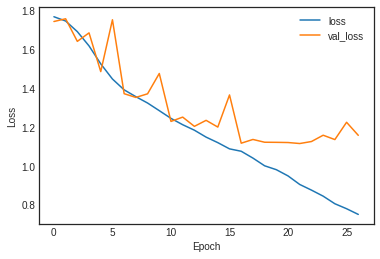

In [100]:
plt.plot(historyc.history['loss'], label='loss')
plt.plot(historyc.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

#Sources

https://www.kaggle.com/code/basel99/facial-recognition

https://mizykk.tistory.com/55

https://www.kaggle.com/code/apollo2506/facial-recognition

https://www.tensorflow.org/tutorials/images/cnn

https://medium.com/themlblog/how-to-do-facial-emotion-recognition-using-a-cnn-b7bbae79cd8f

https://stackoverflow.com/questions/55776436/keras-cnn-model-is-not-learning


https://medium.com/@ml_kid/how-to-save-our-model-to-google-drive-and-reuse-it-2c1028058cb2